In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/country-health-trends-dataset/gapminder.csv


In [2]:
df = pd.read_csv("/kaggle/input/country-health-trends-dataset/gapminder.csv")

In [3]:
df

,Country,LifeExpectancy,FertilityRate,Population,Region
0,Afghanistan,51.000,7.81,19701940,South Asia
1,Albania,74.200,2.47,3121965,Europe & Central Asia
2,Algeria,73.200,2.63,31183658,Middle East & North Africa
3,Angola,52.600,6.88,15058638,Sub-Saharan Africa
4,Antigua and Barbuda,73.900,2.32,77648,America
...,...,...,...,...,...
186,Virgin Islands (U.S.),79.247,2.13,108511,America
187,West Bank and Gaza,73.500,5.57,3223781,Middle East & North Africa
188,Western Sahara,66.507,3.04,305615,Middle East & North Africa
189,Zambia,45.700,6.10,10585220,Sub-Saharan Africa


# Preprocessing

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LifeExpectancy,191.0,68.427293,9.369538,45.70,61.40,71.3,75.85,82.663
FertilityRate,191.0,3.297906,1.763855,0.88,1.79,2.8,4.50,7.810


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   FertilityRate   191 non-null    float64
 3   Population      191 non-null    object 
 4   Region          191 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.6+ KB


In [6]:
print(df['Population'].unique())

['19701940' '3121965' '31183658' '15058638' '77648' '37057453' '3076098'
 '90858' '19,107,251' '8,050,884' '8117742' '297891' '666855' '131280739'
 '269838' '9952055' '10,268,380' '247312' '6949366' '564187' '8339512'
 '3792878' '1736579' '175786441' '330554' '8000510' '11607944' '6767073'
 '12197905' '15927713' '30701903' '438737' '8343321' '148725' '15,170,387'
 '1,269,974,572' '40403959' '547696' '48048664' '3109269' '3925450'
 '16517948' '4428069' '11116787' '943287' '5,338,283' '722562' '12628596'
 '68334905' '5811836' '530896' '3535156' '1399145' '66443603' '811223'
 '5,176,482' '59,387,183' '163162' '237267' '1231548' '1228863' '4743591'
 '81,895,925' '18824994' '10,954,032' '56174' '101620' '431157' '155328'
 '11688660' '8799165' '1315455' '742218' '8549202' '6243080' '6783502'
 '10224113' '281214' '1053481072' '211,540,428' '65850062' '23574751'
 '3,841,574' '6013711' '57,147,081' '2600095' '125,714,674' '4767476'
 '14956769' '31065820' '84406' '1929470' '2371481' '3235380' '1

In [7]:
numeric_population = pd.to_numeric(df['Population'], errors='coerce')

nan_population_rows = df[numeric_population.isna()]
print(nan_population_rows)

           Country  LifeExpectancy  FertilityRate     Population  \
8        Australia            79.7           1.76     19,107,251   
9          Austria            78.2           1.34      8,050,884   
16         Belgium            77.8           1.62     10,268,380   
34           Chile            77.2           2.14     15,170,387   
35           China            71.5           1.45  1,269,974,572   
45         Denmark            76.9           1.74      5,338,283   
55         Finland            77.8           1.73      5,176,482   
56          France            79.1           1.80     59,387,183   
62         Germany            78.1           1.35     81,895,925   
64          Greece            78.0           1.27     10,954,032   
79       Indonesia            68.3           2.50    211,540,428   
82         Ireland            76.7           1.94      3,841,574   
84           Italy            79.6           1.21     57,147,081   
86           Japan            81.1           1.3

In [8]:
df['Population'] = df['Population'].str.replace(',', '').astype(int)

print(df['Population'])
print(df['Population'].dtype)

0      19701940
1       3121965
2      31183658
3      15058638
4         77648
         ...   
186      108511
187     3223781
188      305615
189    10585220
190    12499981
Name: Population, Length: 191, dtype: int64
int64


# EDA + Comparative Analysis

## Univariated Analysis

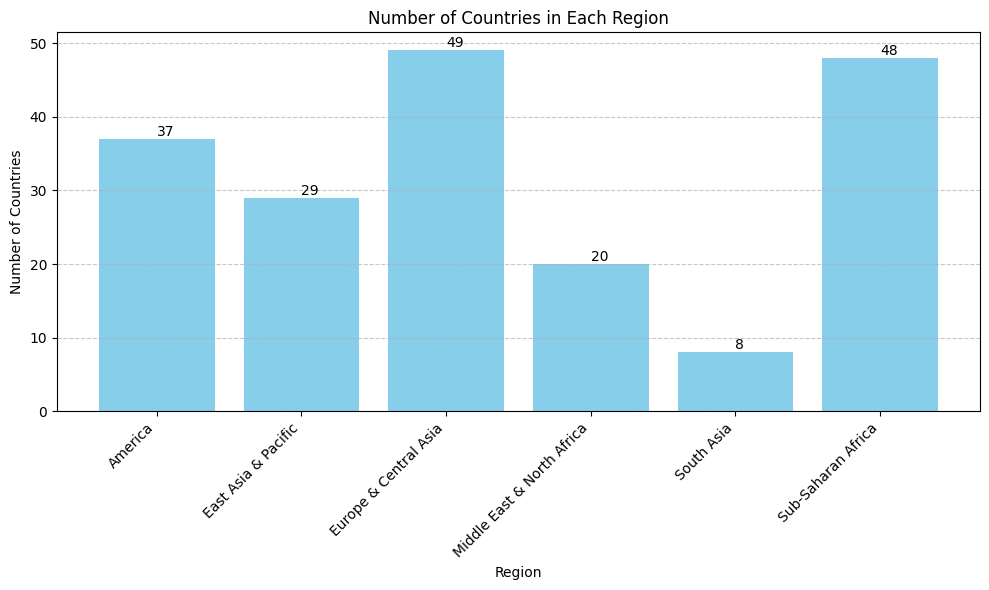

In [9]:
countries_per_region = df.groupby('Region')['Country'].nunique().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(countries_per_region['Region'], countries_per_region['Country'], color='skyblue')
plt.title('Number of Countries in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), va='bottom')

plt.tight_layout()
plt.show()

In [10]:
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode='country names',
                    color="LifeExpectancy",
                    hover_name="Country",
                    hover_data={"LifeExpectancy": True,
                               "Population": True},
                    title="World Map of Life Expectancy",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [11]:
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode='country names',
                    color="Population",
                    hover_name="Country",
                    hover_data={"LifeExpectancy": True,
                               "Population": True},
                    title="World Map of Population",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

## Highest and Lowest LifeExpectancy by Country

In [12]:
country_highest_life_expectancy = df.loc[df['LifeExpectancy'].idxmax()]['Country']
highest_life_expectancy = df['LifeExpectancy'].max()

country_lowest_life_expectancy = df.loc[df['LifeExpectancy'].idxmin()]['Country']
lowest_life_expectancy = df['LifeExpectancy'].min()

print("Country with the highest life expectancy:", country_highest_life_expectancy, "with a life expectancy of", highest_life_expectancy)
print("Countries with the lowest life expectancy:", country_lowest_life_expectancy, "with a life expectancy of", lowest_life_expectancy)

Country with the highest life expectancy: Hong Kong, China with a life expectancy of 82.663
Countries with the lowest life expectancy: Zambia with a life expectancy of 45.7


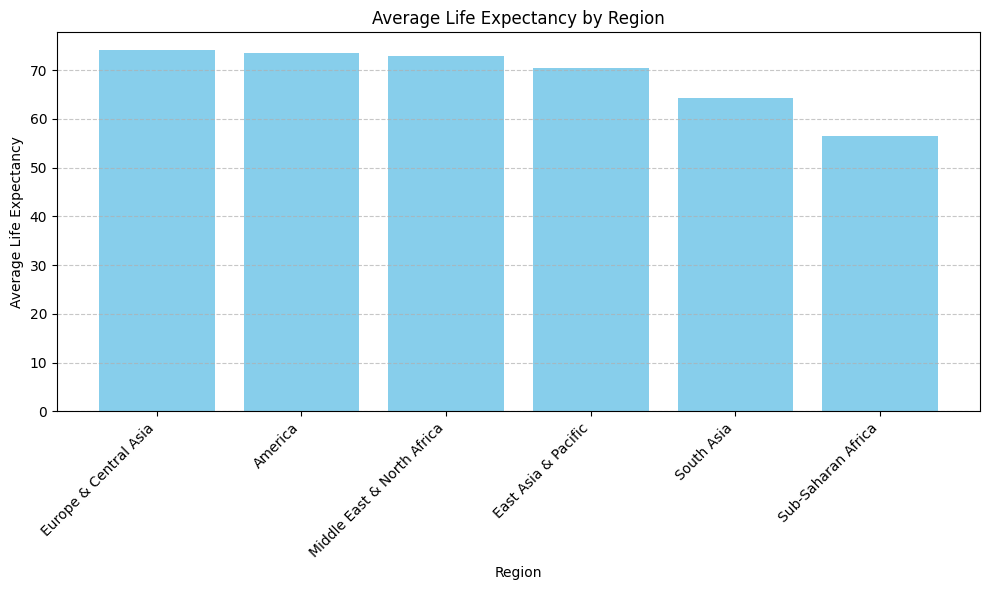

In [13]:
average_life_expectancy_by_region = df.groupby('Region')['LifeExpectancy'].mean().reset_index()

average_life_expectancy_by_region = average_life_expectancy_by_region.sort_values(by='LifeExpectancy', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_life_expectancy_by_region['Region'], average_life_expectancy_by_region['LifeExpectancy'], color='skyblue')
plt.title('Average Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

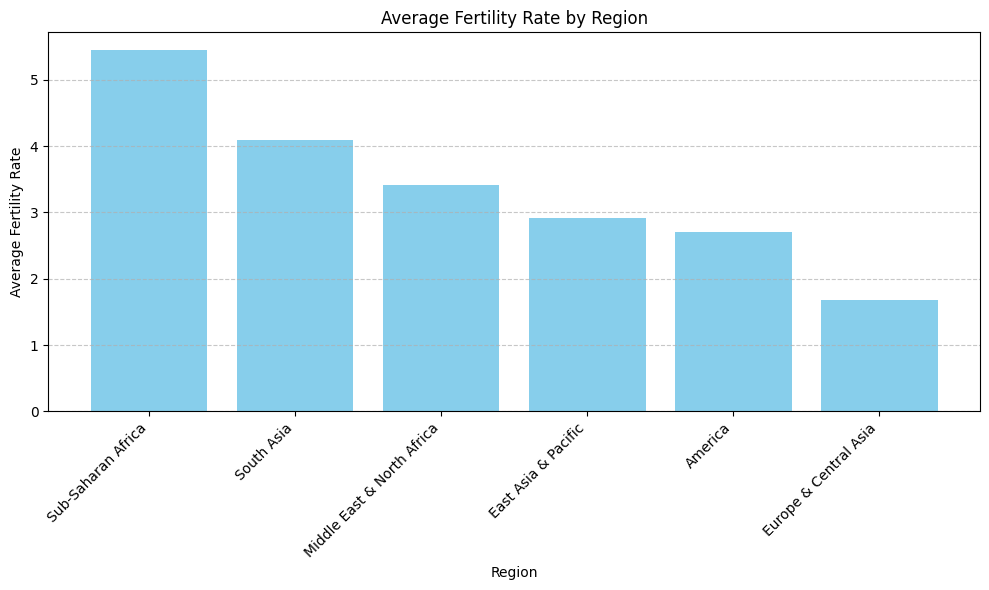

In [14]:
average_fertility_rate_by_region = df.groupby('Region')['FertilityRate'].mean().reset_index()

average_fertility_rate_by_region = average_fertility_rate_by_region.sort_values(by='FertilityRate', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_fertility_rate_by_region['Region'], average_fertility_rate_by_region['FertilityRate'], color='skyblue')
plt.title('Average Fertility Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Fertility Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bivariated & Multivariated Analysis

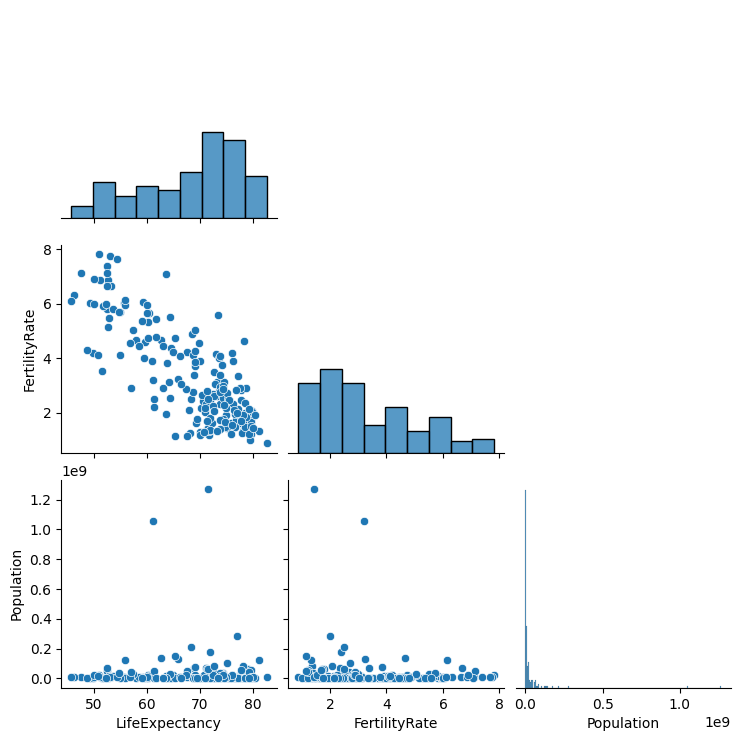

In [15]:
sns.pairplot(df,corner=True)

## Correlation

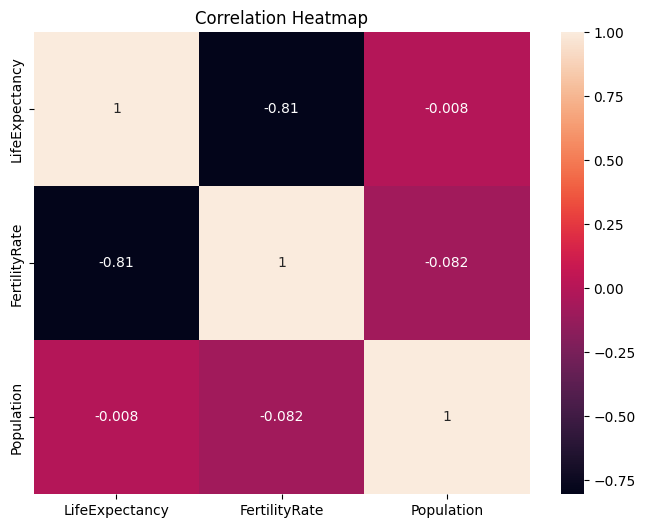

In [16]:
correlation_df = df[['LifeExpectancy', 'FertilityRate', 'Population']]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## MinMax Scaling

In [18]:
columns_to_scale = ['Population', 'LifeExpectancy', 'FertilityRate']

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

print(df_scaled.head())

   Population  LifeExpectancy  FertilityRate
0    0.015470        0.143387       1.000000
1    0.002414        0.771041       0.229437
2    0.024511        0.743987       0.252525
3    0.011814        0.186673       0.865801
4    0.000017        0.762925       0.207792


## Life Expectancy by Population and FertilityRate

In [19]:
X = df_scaled[['Population', 'FertilityRate']]
y = df_scaled['LifeExpectancy']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nCoefficients:")
for i, feature in enumerate(X.columns):
    print(feature, ":", model.coef_[i])
print("Intercept:", model.intercept_)

Mean Squared Error: 0.01625644597801332
R-squared: 0.7254210889500806

Coefficients:
Population : -0.16596517861949095
FertilityRate : -0.8022007648813616
Intercept: 0.8937140633327207


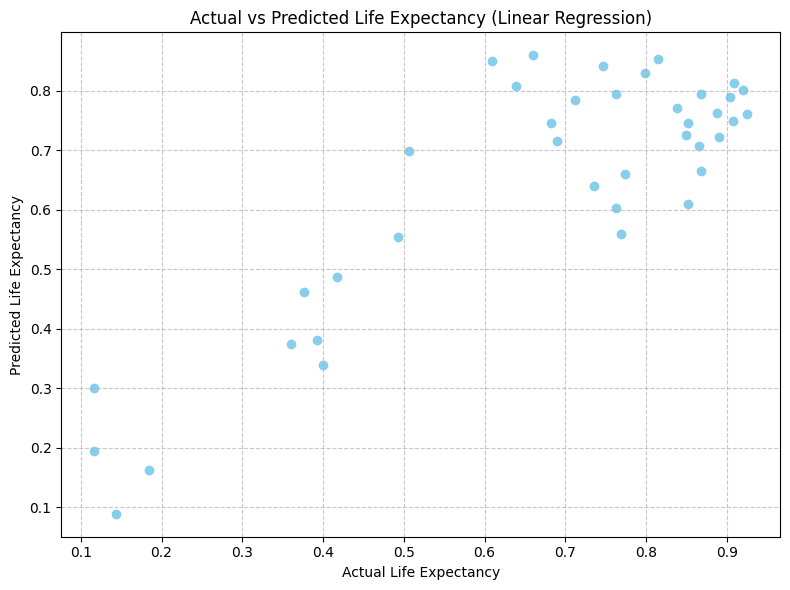

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.title('Actual vs Predicted Life Expectancy (Linear Regression)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()